In [48]:
import numpy as np
import pandas as pd
import theano
import theano.tensor as T

from theano import function
from theano import pp

# Adding two Scalars

In [26]:
x = T.dscalar('x')
y = T.iscalar('y')

z = x + y

f = function([x, y], z)

In [27]:
f(2,3)

array(5.0)

In [28]:
print(pp(z))

(x + y)


# Adding two Matrices

In [44]:
x = T.dmatrix('x')
y = T.dmatrix('y')

z = x + y

f = function([x, y], z)

In [46]:
f(np.zeros([5, 5]), np.ones([5, 5]))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

# Exercise

In [55]:
a = theano.tensor.vector() # declare variable
b = theano.tensor.vector() # 2nd variable

#out = a + a ** 10
out = a ** 2 + b ** 2 + 2 * a * b

f = function([a, b], out)

In [58]:
print(f([1, 2], [4, 5]))  # prints [ 25.  49.]

[ 25.  49.]


# Logistic Function

$s = \frac{1}{1 + e^{-x}} $

In [66]:
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))

logistic = function([x], s)

In [67]:
logistic(np.eye(3))

array([[ 0.73105858,  0.5       ,  0.5       ],
       [ 0.5       ,  0.73105858,  0.5       ],
       [ 0.5       ,  0.5       ,  0.73105858]])

In [68]:
s2 =(1 + T.tanh(x / 2)) / 2

logistic2 = theano.function([x], s2)

In [69]:
logistic2(np.eye(3))

array([[ 0.73105858,  0.5       ,  0.5       ],
       [ 0.5       ,  0.73105858,  0.5       ],
       [ 0.5       ,  0.5       ,  0.73105858]])

# Computing More than one Thing at the Same Time

In [70]:
a, b = T.dmatrices('a', 'b')
diff = a - b
abs_diff = abs(diff)

diff_squared = diff ** 2

f = function([a, b], [diff, abs_diff, diff_squared])

In [77]:
f(np.ones([3, 3]), np.sqrt(np.eye(3) ** np.ones([1, 1])))

[array([[ 0.,  1.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  1.,  0.]]), array([[ 0.,  1.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  1.,  0.]]), array([[ 0.,  1.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  1.,  0.]])]

# Setting a Default Value for an Argument

In [78]:
from theano import In

In [80]:
x, y = T.dscalars('x', 'y')

z = x + y

f = function([x, In(y, value=1)], z)

In [81]:
f(33)

array(34.0)

In [82]:
f(33, 2)

array(35.0)

In [83]:
#

In [87]:
x, y, w = T.dscalars('x', 'y', 'w')

z = (x + y) * w

f = function([x, In(y, value=1), In(w, value=2, name='w_by_name')], z)

In [88]:
f(33)

array(68.0)

In [89]:
f(33, 2)

array(70.0)

In [90]:
f(33, 0, 1)

array(33.0)

In [91]:
f(33, w_by_name=1)

array(34.0)

In [92]:
f(33, w_by_name=1, y=0)

array(33.0)

# Using Shared Variables

In [94]:
from theano import shared

In [95]:
state = shared(0)

inc = T.iscalar('inc')

accumulator = function([inc], state, updates=[(state, state+inc)])

In [96]:
print state.get_value()

0


In [99]:
accumulator(1)

array(0)

In [100]:
print accumulator(300)

1


In [101]:
print accumulator(300)

301


In [102]:
print accumulator(300)

601


In [113]:
state.set_value(-1)

In [114]:
accumulator(3)

array(-1)

In [115]:
accumulator(2)

array(2)

In [116]:
accumulator(0)

array(4)

In [117]:
state.get_value()

array(4)

In [118]:
decrementor = function([inc], state, updates=[(state, state-inc)])

In [119]:
decrementor(2)

array(4)

In [120]:
state.get_value()

array(2)

# Skip shared  (by givens=) ?? 

In [121]:
fn_of_state = state * 2 + inc

In [122]:
foo = T.scalar(dtype=state.dtype)

In [123]:
skip_shared = function([inc, foo], fn_of_state, givens=[(state, foo)])

In [124]:
skip_shared(1, 3)

array(7)

# Using Random Numbers

In [125]:
from theano.tensor.shared_randomstreams import RandomStreams

In [135]:
srng = RandomStreams(seed=234)

In [136]:
rv_u = srng.uniform((2, 2))

In [137]:
rv_n = srng.normal((2, 2))

In [138]:
f = function([], rv_u)

In [139]:
g = function([], rv_n, no_default_updates=True)

In [140]:
nearly_zeros = function([], rv_u + rv_u  - 2 * rv_u)

In [141]:
nearly_zeros()

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [145]:
f()

array([[ 0.44078225,  0.26993382],
       [ 0.14317277,  0.43571538]], dtype=float32)

In [146]:
g()

array([[ 0.37328446, -0.65746671],
       [-0.36302373, -0.97484624]], dtype=float32)

In [147]:
nearly_zeros()

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [148]:
f_val0 = f()
f_val1 = f()

# Seeding Streams ??

In [192]:
rng_val = rv_u.rng.get_value(borrow=True)
rng_val.seed(89234) 
rv_u.rng.set_value(rng_val, borrow=True)

In [193]:
srng.seed(902340)

In [194]:
f = function([], rv_n)

In [195]:
f()

array([[ 1.1442008 , -1.63244879],
       [-0.43990538,  1.11564338]], dtype=float32)

# Sharing Streams Between Functions

In [197]:
state_after_v0 = rv_u.rng.get_value().get_state()
nearly_zeros()

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [198]:
v1 = f()

In [199]:
rng = rv_u.rng.get_value(borrow=True)
rng.set_state(state_after_v0)
rv_u.rng.set_value(rng, borrow=True)

In [200]:
v2 = f()
v3 = f()

# Copying Random State Between Theano Graphs

In [202]:
from __future__ import print_function
import theano
from theano.sandbox.rng_mrg import MRG_RandomStreams
from theano.tensor.shared_randomstreams import RandomStreams

In [203]:
class Graph():
    def __init__(self, seed=123):
        self.rng = RandomStreams(seed)
        self.y = self.rng.uniform(size=(1,))       

In [204]:
g1 = Graph(seed=123)

In [205]:
f1 = function([], g1.y)

In [206]:
g2 = Graph(seed=987)

In [207]:
f2 = function([], g2.y)

In [208]:
f1()

array([ 0.72803009], dtype=float32)

In [210]:
f2()

array([ 0.55056769], dtype=float32)

In [211]:
def copy_random_state(g1, g2):
    if isinstance(g1.rng, MRG_RandomStreams):
        g2.rng.rstate = g1.rng.rstate
    for (su1, su2) in zip(g1.rng.state_updates, g2.rng.state_updates):
        su2[0].set_value(su1[0].get_value(0))

In [212]:
copy_random_state(g1, g2)

In [213]:
f1()

array([ 0.59044123], dtype=float32)

In [220]:
f2()

array([ 0.86608779], dtype=float32)

# A Real Example: Logistic Regression

In [235]:
rng = np.random

In [236]:
N = 400
feats = 784

In [237]:
# generate a dataset: D

In [346]:
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))

training_steps = 30

In [347]:
# Theano variables

x = T.matrix('x')
y = T.vector('y')

In [348]:
# shared, because they need to keep their values between training iters

#init weights:
w = theano.shared(rng.randn(feats), name='w')

# init bias:
b = theano.shared(0., name='b')

In [349]:
#print ('Initial model:')
#print(w.get_value())
#print(b.get_value())

In [350]:
# construct theano expression graph
#prob that target = 1
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))
# prediction threshold
prediction = p_1 > 0.5
# cross-entropy loss function
xent = -y * T.log(p_1) - (1 - y) * T.log(1 - p_1)
# the cost to minimize 
cost = xent.mean() + 0.01 * (w ** 2).sum()
# compute gradient of the w.r.t weight vector w and bias term b
gw, gb = T.grad(cost, [w, b])

In [351]:
# Compile:
train = function(
    inputs=[x, y],
    outputs=[prediction, xent],
    updates=((w, w - 0.9 * gw), (b, b - 0.9 * gb)),
    allow_input_downcast=True
)
predict = function(inputs=[x], outputs=prediction,
                  allow_input_downcast=True)

#Train
for i in range(training_steps):
    pred, err = train(D[0], D[1])

In [352]:
from sklearn.metrics import accuracy_score

In [353]:
accuracy_score(D[1], predict(D[0]))

0.99250000000000005

# Derivatives in Theano

## Computing Gradients

In [355]:
x = T.dscalar('x')
y = x ** 2

gy = T.grad(y, x)

In [359]:
pp(gy)

'((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))'

In [360]:
f = function([x], gy)

In [361]:
f(4)

array(8.0)

In [362]:
np.allclose(f(94.2), 188.4)

True

In [365]:
pp(f.maker.fgraph.outputs[0]) #!!!

'(TensorConstant{2.0} * x)'

In [ ]:
##

In [384]:
x = T.dmatrix('x')
s = T.sum(1 / (1 + T.exp(-x)))

gs = T.grad(s, x)

dlogistic = function([x], gs)
dlogistic([[0, 1], [-1, -2]])

array([[ 0.25      ,  0.19661193],
       [ 0.19661193,  0.10499359]])

In [385]:
dlogistic([[3]])

array([[ 0.04517666]])

In [386]:
%matplotlib inline

In [387]:
import matplotlib.pylab as plt

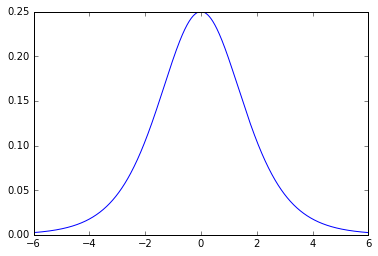

In [388]:
# norm !!
x_ = np.linspace(-6, 6, 1000)
plt.plot(x_, dlogistic([x_])[0])

## Computing the Jacobian

In [390]:
f = theano.gradient.jacobian(s, x)

In [391]:
jacob = function([x], f)

In [395]:
# manually:

x = T.dvector('x')
y = x ** 2

J, updates =  theano.scan(lambda i, y,x : 
                          T.grad(y[i], x),
                          sequences=T.arange(y.shape[0]),
                          non_sequences=[y,x])

f = function([x], J, updates=updates)

In [396]:
f([4, 4])

array([[ 8.,  0.],
       [ 0.,  8.]])

## Computing the Hessian

In [399]:
##
f = theano.gradient.hessian(y.sum(), x) 

In [402]:
hess = function([x], f)

In [403]:
hess([1,2,3,4,5])

array([[ 2.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  2.]])

In [404]:
# manually:

In [407]:
x = T.dvector('x')
y = x ** 2
cost = y.sum()

gy = T.grad(cost, x)

H, updates = theano.scan(lambda i, gy,x :
                         T.grad(gy[i], x),
                         sequences=T.arange(gy.shape[0]),
                         non_sequences=[gy, x])

f = function([x], H, updates=updates)

In [409]:
f([1,2,3,4,5])

array([[ 2.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  2.]])

## R-operator, L-operator

In [411]:
# hessian * vector or vector * hessian ??

# Conditions

## IfElse vs Switch

In [413]:
import time
from theano.ifelse import ifelse

In [414]:
a, b = T.scalars('a', 'b')
x, y = T.matrices('x', 'y')

In [420]:
z_switch = T.switch(T.lt(a, b), T.mean(x), T.mean(y))

z_lazy = ifelse(T.lt(a, b), T.mean(x), T.mean(y))

In [424]:
f_switch = function([a, b, x, y], z_switch,
                    mode=theano.Mode(linker='vm'),
                    allow_input_downcast=True
                   )
                    
f_lazyifelse = function([a, b, x, y], z_lazy,
                        mode=theano.Mode(linker='vm'),
                       allow_input_downcast=True)

In [427]:
val1 = 0.
val2 = 1.

big_mat1 = numpy.ones((10000, 1000))
big_mat2 = numpy.ones((10000, 1000))

n_times = 10

tic = time.clock()

for i in range(n_times):
    f_switch(val1, val2, big_mat1, big_mat2)
print (time.clock() - tic)

tic = time.clock()

for i in range(n_times):
    f_lazyifelse(val1, val2, big_mat1, big_mat2)
    
print (time.clock() - tic)

0.602603
0.399946


# Loop

## Scan

In [429]:
#example

In [430]:
X = T.matrix('X')
W = T.matrix('W')
b_sym = T.vector('b_sym')

results, updates = theano.scan(lambda v: T.tanh(T.dot(v, W) + b_sym),
                              sequences=X)

compute_elementwise = function(inputs=[X, W, b_sym], outputs=[results])

INFO (theano.gof.compilelock): Refreshing lock /home/novikov/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/novikov/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir/lock


In [431]:
x = np.eye(2, dtype=theano.config.floatX)
w = np.ones((2, 2), dtype=theano.config.floatX)
b = np.ones((2), dtype=theano.config.floatX)

b[1] = 2

In [432]:
print(compute_elementwise(x, w, b)[0])

[[ 0.96402758  0.99505478]
 [ 0.96402758  0.99505478]]


In [433]:
print(np.tanh(x.dot(w) + b))

[[ 0.96402758  0.99505478]
 [ 0.96402758  0.99505478]]


In [435]:
np.tanh(x.dot(w))

array([[ 0.76159418,  0.76159418],
       [ 0.76159418,  0.76159418]], dtype=float32)

In [436]:
x.dot(w)

array([[ 1.,  1.],
       [ 1.,  1.]], dtype=float32)

In [441]:
t = T.tanh(T.dot(X, W) + b_sym)
f = function(inputs=[X, W, b_sym], outputs=t)

INFO (theano.gof.compilelock): Refreshing lock /home/novikov/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/novikov/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir/lock


In [442]:
f(x, w, b)

array([[ 0.96402758,  0.99505478],
       [ 0.96402758,  0.99505478]], dtype=float32)

In [443]:
# the same

##### Computing the sequence x(t) = tanh(x(t - 1).dot(W) + y(t).dot(U) + p(T - t).dot(V))

In [450]:
X = T.vector("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")
U = T.matrix("U")
Y = T.matrix("Y")
V = T.matrix('V')
P = T.matrix("P")

results, updates = theano.scan(lambda y, p, x_tm1:
                               T.tanh(T.dot(x_tm1, W) + 
                                      T.dot(y, U) +
                                      T.dot(p, V)),
                               sequences=[Y, P[::-1]],
                               outputs_info=[X])

compute_seq = theano.function(inputs=[X, W, Y, U, P, V], outputs=[results])

# test values
x = np.zeros((2), dtype=theano.config.floatX)
x[1] = 1
w = np.ones((2, 2), dtype=theano.config.floatX)
y = np.ones((5, 2), dtype=theano.config.floatX)
y[0, :] = -3
u = np.ones((2, 2), dtype=theano.config.floatX)
p = np.ones((5, 2), dtype=theano.config.floatX)
p[0, :] = 3
v = np.ones((2, 2), dtype=theano.config.floatX)

print(compute_seq(x, w, y, u, p, v)[0])

# comparison with numpy
x_res = np.zeros((5, 2), dtype=theano.config.floatX)
x_res[0] = np.tanh(x.dot(w) + y[0].dot(u) + p[4].dot(v))
for i in range(1, 5):
    x_res[i] = np.tanh(x_res[i - 1].dot(w) + y[i].dot(u) + p[4-i].dot(v))
print(x_res)

[[-0.99505478 -0.99505478]
 [ 0.96471971  0.96471971]
 [ 0.99998587  0.99998587]
 [ 0.99998772  0.99998772]
 [ 1.          1.        ]]
[[-0.99505478 -0.99505478]
 [ 0.96471971  0.96471971]
 [ 0.99998587  0.99998587]
 [ 0.99998772  0.99998772]
 [ 1.          1.        ]]


# norms of lines (or raws)

In [454]:
# define tensor variable
X = T.matrix("X")

results, updates = theano.scan(lambda x_i: T.sqrt((x_i ** 2).sum()),
                               sequences=[X])

compute_norm_lines = theano.function(inputs=[X], 
                                     outputs=[results])

# test value
x = np.diag(np.arange(1, 6, 
                      dtype=theano.config.floatX), 1)

print(compute_norm_lines(x)[0])

# comparison with numpy
print(np.sqrt((x ** 2).sum(1)))

[ 1.  2.  3.  4.  5.  0.]
[ 1.  2.  3.  4.  5.  0.]


In [455]:
X = T.matrix("X")
results, updates = theano.scan(lambda x_i: T.sqrt((x_i ** 2).sum()), sequences=[X.T])
compute_norm_cols = theano.function(inputs=[X], outputs=[results])

# test value
x = np.diag(np.arange(1, 6, dtype=theano.config.floatX), 1)
print(compute_norm_cols(x)[0])

# comparison with numpy
print(np.sqrt((x ** 2).sum(0)))

[ 0.  1.  2.  3.  4.  5.]
[ 0.  1.  2.  3.  4.  5.]


In [463]:
floatX = "float32"

# define tensor variable
X = T.matrix("X")
results, updates = theano.scan(lambda i, j, t_f: 
                               T.cast(X[i, j] + t_f, floatX),
                  sequences=[T.arange(X.shape[0]), T.arange(X.shape[1])],
                  outputs_info=np.asarray(0., dtype=floatX))

result = results[-1]
compute_trace = theano.function(inputs=[X], outputs=[result])

# test value
x = np.eye(54444, dtype=theano.config.floatX)
x[0] = np.arange(54444, dtype=theano.config.floatX)

tic = time.clock()

print(compute_trace(x)[0])

print(time.clock() - tic)


tic = time.clock()
# comparison with numpy
print(np.diagonal(x).sum())

print(time.clock() - tic)

54443.0
1.605857
54443.0
0.00108900000001


##### Scan Example: Computing the sequence x(t) = x(t - 2).dot(U) + x(t - 1).dot(V) + tanh(x(t - 1).dot(W) + b)

In [473]:
# define tensor variables
X = T.matrix("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")
U = T.matrix("U")
V = T.matrix("V")
n_sym = T.iscalar("n_sym")

results, updates = theano.scan(lambda x_tm2, x_tm1: 
                               T.dot(x_tm2, U) + 
                               T.dot(x_tm1, V) + 
                               T.tanh(T.dot(x_tm1, W) + b_sym),
                               n_steps=n_sym,
                               outputs_info=[dict(initial=X, taps=[-2, -1])])

compute_seq2 = theano.function(inputs=[X, U, V, W, b_sym, n_sym], outputs=[results])

# test values
x = np.zeros((2, 2), dtype=theano.config.floatX) # the initial value must be able to return x[-2]
x[1, 1] = 1
w = 0.5 * np.ones((2, 2), dtype=theano.config.floatX)
u = 0.5 * (np.ones((2, 2), dtype=theano.config.floatX) - np.eye(2, dtype=theano.config.floatX))
v = 0.5 * np.ones((2, 2), dtype=theano.config.floatX)
n = 10
b = np.ones((2), dtype=theano.config.floatX)

print(compute_seq2(x, u, v, w, b, n))

# comparison with numpy
x_res = np.zeros((10, 2))
x_res[0] = x[0].dot(u) + x[1].dot(v) + np.tanh(x[1].dot(w) + b)
x_res[1] = x[1].dot(u) + x_res[0].dot(v) + np.tanh(x_res[0].dot(w) + b)
x_res[2] = x_res[0].dot(u) + x_res[1].dot(v) + np.tanh(x_res[1].dot(w) + b)
for i in range(2, 10):
    x_res[i] = (x_res[i - 2].dot(u) + x_res[i - 1].dot(v) +
                np.tanh(x_res[i - 1].dot(w) + b))
print(x_res)

[array([[  1.40514827,   1.40514827],
       [  2.88898897,   2.38898897],
       [  4.34018326,   4.34018326],
       [  6.53463173,   6.78463173],
       [  9.82972336,   9.82972336],
       [ 14.22203922,  14.09703922],
       [ 20.07440186,  20.07440186],
       [ 28.12292099,  28.18542099],
       [ 39.19137192,  39.19137192],
       [ 54.28408051,  54.25283051]], dtype=float32)]
[[  1.40514827   1.40514827]
 [  2.888989     2.388989  ]
 [  4.34018293   4.34018293]
 [  6.53463145   6.78463145]
 [  9.82972247   9.82972247]
 [ 14.22203819  14.09703819]
 [ 20.07439943  20.07439943]
 [ 28.12291853  28.18541853]
 [ 39.19136824  39.19136824]
 [ 54.2840775   54.2528275 ]]


# Jacobian

In [475]:
# define tensor variables
v = T.vector()
A = T.matrix()
y = T.tanh(T.dot(v, A))
results, updates = theano.scan(lambda i: T.grad(y[i], v), sequences=[T.arange(y.shape[0])])
compute_jac_t = theano.function([A, v], [results], allow_input_downcast=True) # shape (d_out, d_in)

# test values
x = np.eye(5, dtype=theano.config.floatX)[0]
w = np.eye(5, 3, dtype=theano.config.floatX)
w[2] = np.ones((3), dtype=theano.config.floatX)
print(compute_jac_t(w, x)[0])

INFO (theano.gof.compilelock): Refreshing lock /home/novikov/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /home/novikov/.theano/compiledir_Linux-3.19--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.11-64/lock_dir/lock


[[ 0.4199743  0.         0.4199743  0.         0.       ]
 [ 0.         1.         1.         0.         0.       ]
 [ 0.         0.         1.         0.         0.       ]]


## Scan Example: Calculating a Polynomial

In [477]:
theano.config.warn.subtensor_merge_bug = False

coefficients = theano.tensor.vector("coefficients")
x = T.scalar("x")
max_coefficients_supported = 10000

# Generate the components of the polynomial
full_range=theano.tensor.arange(max_coefficients_supported)
components, updates = theano.scan(fn=lambda coeff, power, free_var:
                                  coeff * (free_var ** power),
                                  outputs_info=None,
                                  sequences=[coefficients, full_range],
                                  non_sequences=x)

polynomial = components.sum()
calculate_polynomial = theano.function(inputs=[coefficients, x],
                                     outputs=polynomial)

test_coeff = numpy.asarray([1, 0, 2], dtype=numpy.float32)
print(calculate_polynomial(test_coeff, 3))

19.0


In [481]:
x = T.matrix('x')
y = T.matrix('y')

z = theano.tensor.join(0, x, y)

In [482]:
xv = numpy.random.rand(5, 4)
yv = numpy.random.rand(3, 3)

In [485]:
f = theano.function([x, y], z.shape, allow_input_downcast=True)

In [486]:
f(xv, yv)

array([8, 4])

# Optimization

In [ ]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.randomza.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

In [535]:
from theano import function, config, shared, sandbox
import theano.sandbox.cuda.basic_ops
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], sandbox.cuda.basic_ops.gpu_from_host(T.exp(x)))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
print("Numpy result is %s" % (numpy.asarray(r),))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[GpuElemwise{exp,no_inplace}(<CudaNdarrayType(float32, vector)>)]
Looping 1000 times took 0.231745 seconds
Result is CudaNdarray([ 1.23178029  1.61879349  1.52278066 ...,  2.20771813  2.29967761
  1.62323296])
Numpy result is [ 1.23178029  1.61879349  1.52278066 ...,  2.20771813  2.29967761
  1.62323296]
Used the gpu


In [548]:
import theano.tensor as T
from theano import function

y_true = T.dvector('y_true')

y_pred = T.dvector('y_pred')

result = T.mean((y_true - y_pred) ** 2)

my_metric = function([y_true, y_pred], result)

my_metric([1,2,3,4,5], [1,2,3,4,6])

array(0.2)

In [550]:
my_metric([1, 1, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0])

array(0.8333333333333334)